## Please refer 'airbnb_nyc_data_analyze_and_modeling_v3' notebook for latest version.

# Airbnb

Dataset I used describes the listing activity and metrics in NYC, NY for 2019.

Dataset link > https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## End Goal/Purpose

Main Goal - is to analyze data to see the what kind of listings people used most, what locations/neighborhoods are the most expensive, how parameters like availability or minmum nights affect the the price.

Secondary - And how to use data to build ml models to predict the cost of accomadations in a certain location and certain accomadation type(private,shared,entire home), minimum nights etc. This is for a customer/user. And ml models to predict the property price or predicted income for property owners who wish to rent their property.

## Analyzing, Visualizing and Cleaning data

Here we
analyze data, visualize, see correlations,decide what column do we need and what we don't need, remove unrelated columns, look for the null/na values or wrong data, treat those data, check outliers, treat the outliers and see if it needs more cleaning.

## Preprocessing

Preprocessing data to feed the model, split data for training, evaluating and testing

## Model

build the model.

## evaluate and test the efficiency

evaluate the model's efficiency and test the data with test dataset manually.

## report

create a report of data and model input shapes, etc.


In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install tensorflow
%pip install matplotlib

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
keras = tf.keras

ModuleNotFoundError: No module named 'tensorflow'

### load data


In [ ]:
df = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1gZub5RlOFHcEuyamGmKdg0SYOIViyspW')

## Analyze, visualize data


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We have 48895 rows and 16 columns in the dataset.

As you can see from the output there are some null values.


<ipython-input-5-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

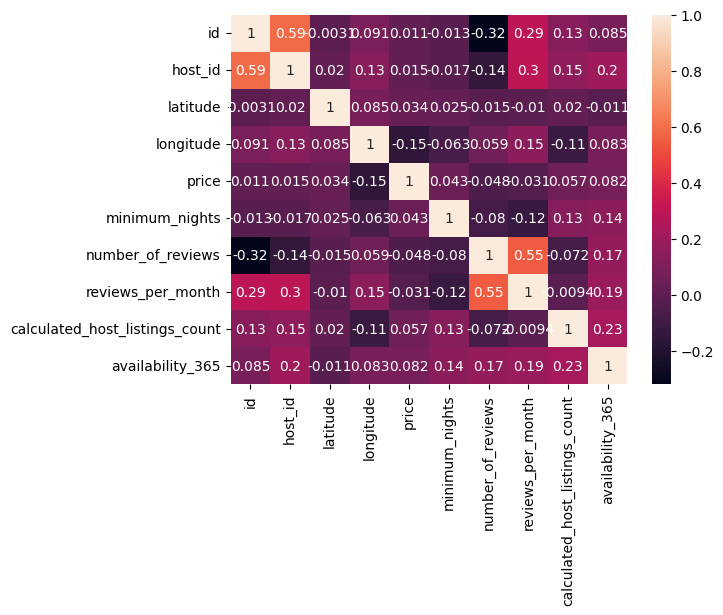

In [5]:
sns.heatmap(df.corr(), annot=True)

I don't see any significant direct corrleations between parameters. We can see reviews_per_month and number_of_reviews have 0.5 correlation. That is straightforward but all of the other values are very low.


One property can have one hostname, one hostname can have multiple properties. Let's see how many properties one hostname own average(mean)


In [6]:
host_names = df['host_name'].unique()
host_name_owned_properties_mean = len(df.index) / len(host_names)
print("there are ", len(host_names), "unique hostnames. One hostname owns averagely ",
      host_name_owned_properties_mean, " properties.")

there are  11453 unique hostnames. One hostname owns averagely  4.2691871125469305  properties.


there are 11453 unique hostnames. One hostname owns averagely 4.2691871125469305 properties.


There are 5 neighbourhood groups.


In [7]:
len(df['neighbourhood_group'].unique())

5

Let's see what neighbourhood group is the most expensive.


In [8]:
sns.set_theme(style='ticks', palette='pastel')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

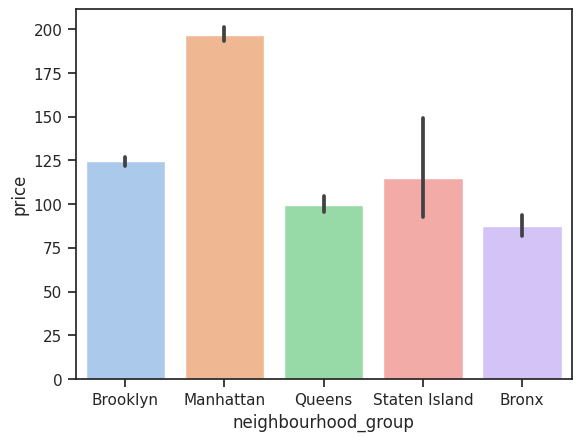

In [9]:
sns.barplot(data=df, x='neighbourhood_group', y='price')

Average price of properties is highest in Manhattan and lowest in Bronx.

Let's see the room type.


<Axes: xlabel='neighbourhood_group', ylabel='price'>

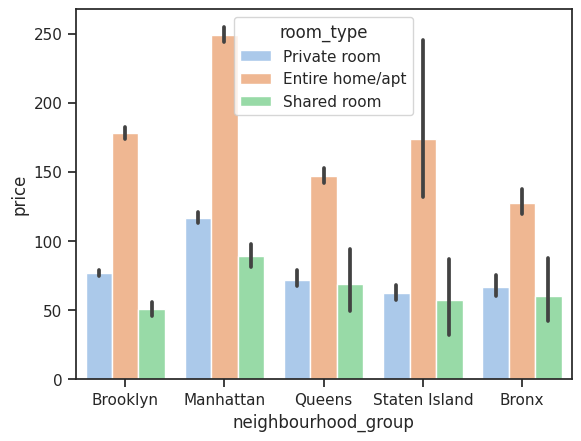

In [10]:
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')

Entire home/apt are more expensive in any neighbourhood group.


<Axes: xlabel='longitude', ylabel='latitude'>

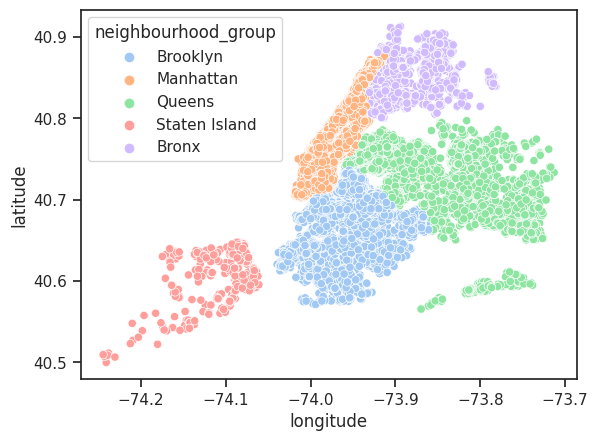

In [11]:
sns.scatterplot(data=df, x='longitude', y='latitude',
                hue='neighbourhood_group')

What is the most favorite room type.


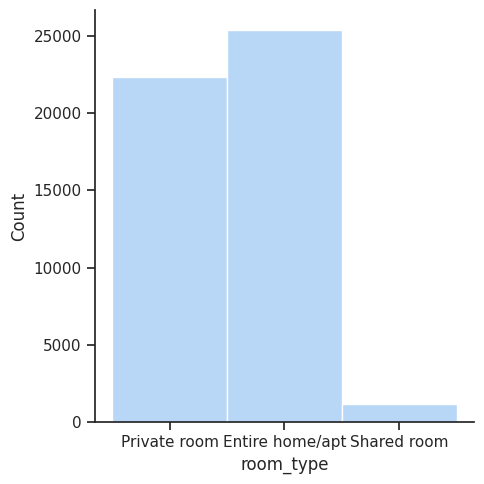

In [12]:
sns.displot(data=df, x='room_type')

Entire home/apt is the most favorite and shared is the least favorite.


<Axes: xlabel='room_type', ylabel='price'>

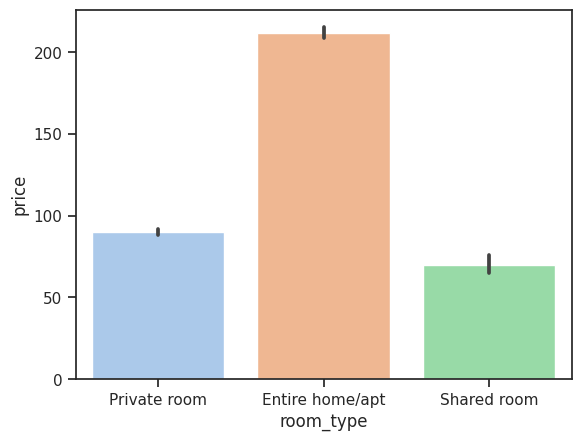

In [13]:
sns.barplot(df, x='room_type', y='price')

<Axes: xlabel='availability_365', ylabel='price'>

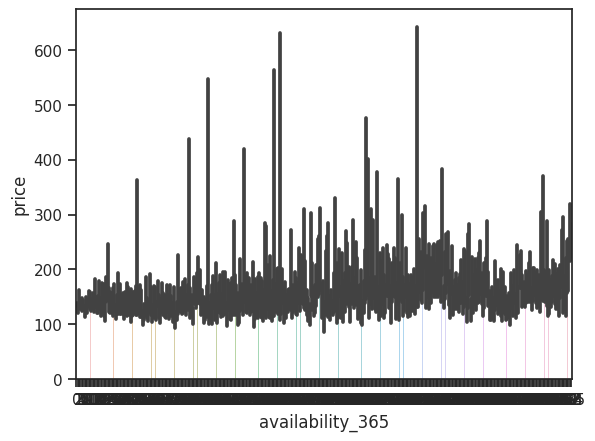

In [14]:
sns.barplot(df, x='availability_365', y='price')

<Axes: xlabel='number_of_reviews', ylabel='price'>

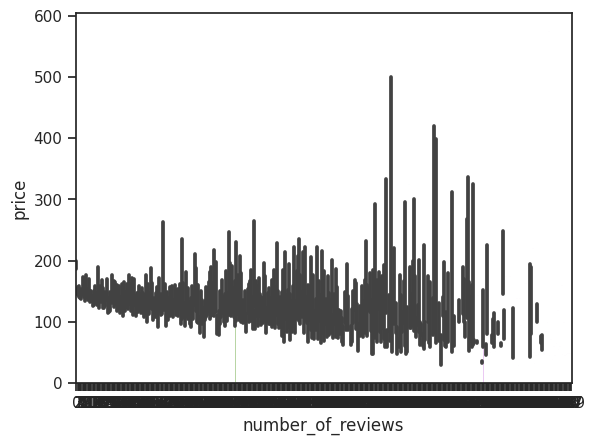

In [15]:
sns.barplot(df, x='number_of_reviews', y='price')

Now let's see the price distribution


<Axes: xlabel='price'>

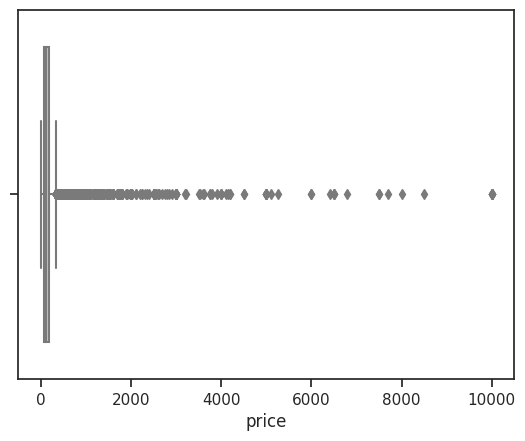

In [16]:
sns.boxplot(df, x='price')

In [17]:
print('highest value for price is ',
      df['price'].max(), ". cheapest one is ", df['price'].min())
print('price mean/average is ', df['price'].mean(), "mode is ",
      df['price'].mode(), "median is ", df['price'].median())
print('standard deviation is ', df['price'].std())

highest value for price is  10000 . cheapest one is  0
price mean/average is  152.7206871868289 mode is  0    100
Name: price, dtype: int64 median is  106.0
standard deviation is  240.15416974718758


Dots are the outliers.


highest value for price is 10000 . cheapest one is 0
price mean/average is 152.7206871868289 mode is 0 100
Name: price, dtype: int64 median is 106.0
standard deviation is 240.15416974718758


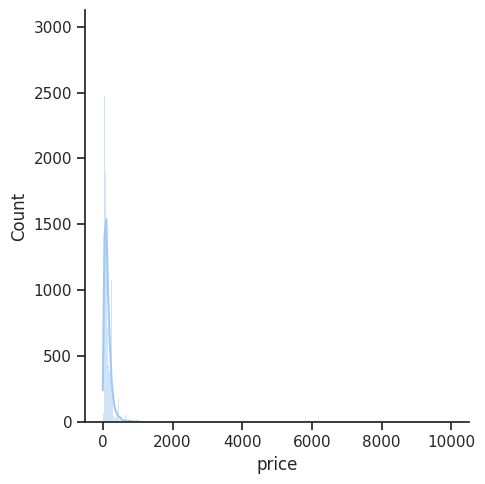

In [18]:
sns.displot(df, x='price', kde=True)

In [19]:
print("in price distribution skew is ",
      df['price'].skew(), ". kurtosis is ", df['price'].kurtosis())

in price distribution skew is  19.118938995046033 . kurtosis is  585.6728788988286


in price distribution skew is 19.118938995046033 . kurtosis is 585.6728788988286

skew and kurtosis is very high. high skew mean data is not evenly distributed. high kurtosis means there's lot of outliers.

If we look closely we can see average rental price is 152$ there are some unusual prices like 10000. This may be caused by wrong entry data, data processing errors, and natural variances.

\*wrong entry data is very straightforward. this means error in entering data.

\*data processing errors can happen in the process of data modeling and manipulation after collecting data.

\*natural variances are the anormalies in real world situations. as a example if we are analyzing exam marks data in a class/school some student may get high marks wheather the exam is hard or easy. They are anormalies.

We can trim, cap, or use other methods or in cases like fraud detection these outliers are used to detect fraud.


## Cleaning data

1.remove unrelated columns

2.check and remove duplicates

3.check for null values and treat them

4.treat outliers


### remove unnecessary columns


In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


id- id doesn't affect the price. That's clear. we can remove that.

name- doesn't affect the price.

host_id - doesn't affect the price.

host_name - doesn't affect the price.

last_review - doesn't affect the price.

last_review - doesn't affect the price.

reviews_per_month - doesn't affect the price.

calculated_host_listings_count - doesn't affect the price.


In [21]:
dfc = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month',
              'calculated_host_listings_count', 'latitude', 'longitude', 'number_of_reviews', 'availability_365'])
dfc.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0


Removed these 'id','name','host_id','host_name','last_review','reviews_per_month','calculated_host_listings_count','latitude','longitude' columns


### Check and remove duplicates


In [22]:
dfc.duplicated().values.any()

True

No duplicates in the dataset.


### Wrong data clean


In [23]:
dfc.isnull().values.any()

False

In [24]:
dfc.isna().values.any()

False

No invalid inputs to clean.


### treat outliers


In [25]:
price_skew_before = dfc['price'].skew()
price_kurtosis_before = dfc['price'].kurtosis()

# make a copy of dataset
new_df = dfc.copy()

p25 = new_df['price'].quantile(0.25)
p75 = new_df['price'].quantile(0.75)
iqr = p75 - p25

# limits
price_lower_limit = p25 - 1.5 * iqr
price_upper_limit = p75 + 1.5 * iqr

# price lower limit is a negative value. we will set it to 0
price_lower_limit = 0

# get trimmed dataset
new_df = new_df[new_df['price'] > price_upper_limit]
new_df.shape

(2972, 7)

There's 2972 records of dataset. We can either remove them or cap them. In this case we will set the values above the upper limit to upper limit.


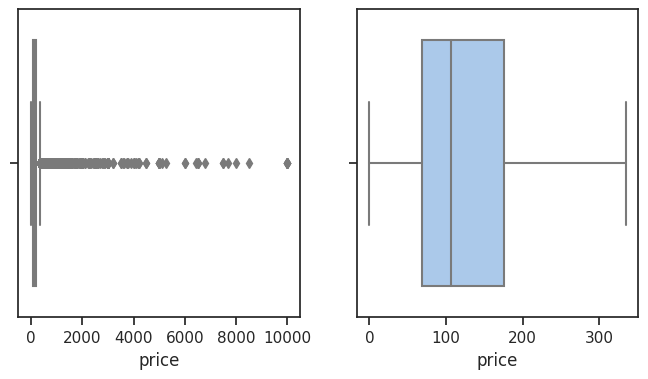

In [26]:
df_cap = dfc.copy()

df_cap['price'] = np.where(
    df_cap['price'] < price_lower_limit,
    price_lower_limit,
    np.where(
        df_cap['price'] > price_upper_limit,
        price_upper_limit,
        df_cap['price']
    )
)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(dfc, x='price')
plt.subplot(1, 2, 2)
sns.boxplot(df_cap, x='price')
plt.show()

Let's see the skew and kurtosis values before and after.


In [27]:
print("before skew is ", dfc['price'].skew(
), "after cleaning outliers skew is ", df_cap['price'].skew())
print("before kurtosis is ", dfc['price'].kurtosis(
), "after cleaning outliers kurtosis is ", df_cap['price'].kurtosis())

before skew is  19.118938995046033 after cleaning outliers skew is  1.0227703235026613
before kurtosis is  585.6728788988286 after cleaning outliers kurtosis is  0.15710037427136436


before skew is 19.118938995046033 after cleaning outliers skew is 1.0227703235026613
before kurtosis is 585.6728788988286 after cleaning outliers kurtosis is 0.15710037427136436


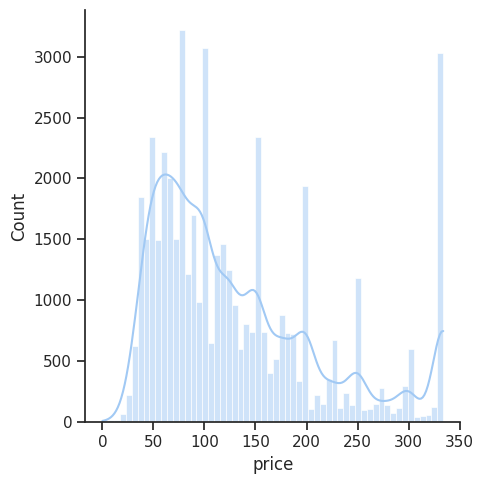

In [28]:
sns.displot(df_cap, x='price', kde=True)

## Preprocessing

Preprocessing data to feed the model, split data for training, evaluating and testing

1. encode categorical data
2. split dataset


There are 3 categorical columns. neighborhood_group, neighborhood and room_type. We can use one hot encoding or label encoding. in this case I will use label encoding. Because there's too much categories in columns like neighborhood. encoding as labels can affect the model's efficiency if they get interpreted as those integer labels have ordinal relationship.


In [29]:
df_cap.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149.0,1,9,365
1,Manhattan,Midtown,Entire home/apt,225.0,1,45,355
2,Manhattan,Harlem,Private room,150.0,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89.0,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80.0,10,9,0


In [30]:
import json

# encode categorical data to labels

room_type_key = 1
neighbourhood_group_key = 1
neighbourhood_key = 1


def encode_room_types_dict(room_types):
    global room_type_key
    encoded_dict = {}
    for room_type in room_types:
        if room_type not in encoded_dict:
            encoded_dict[room_type] = room_type_key
            room_type_key += 1
    return encoded_dict


def encode_neighbourhood_groups_dict(room_types):
    global neighbourhood_group_key
    encoded_dict = {}
    for room_type in room_types:
        if room_type not in encoded_dict:
            encoded_dict[room_type] = neighbourhood_group_key
            neighbourhood_group_key += 1
    return encoded_dict


def encode_neighbourhoods_dict(room_types):
    global neighbourhood_key
    encoded_dict = {}
    for room_type in room_types:
        if room_type not in encoded_dict:
            encoded_dict[room_type] = neighbourhood_key
            neighbourhood_key += 1
    return encoded_dict


encoded_room_type_dict = encode_room_types_dict(dfc['room_type'])
encoded_neighbourhood_groups_dict = encode_neighbourhood_groups_dict(
    dfc['neighbourhood_group'])
encoded_neighbourhoods_dict = encode_neighbourhoods_dict(dfc['neighbourhood'])

# save the encoded dicts as a json files
with open('encoded_room_type_dict.json', "w") as json_file:
    json.dump(encoded_room_type_dict, json_file)

with open('encoded_neighbourhood_groups_dict.json', "w") as json_file:
    json.dump(encoded_neighbourhood_groups_dict, json_file)

with open('encoded_neighbourhoods_dict.json', "w") as json_file:
    json.dump(encoded_neighbourhoods_dict, json_file)

functions for encode categorical data. label encode the categorical data.


In [31]:
def encode_room_types(df):
    for i in df.index:
        if df.loc[i, "room_type"] in encoded_room_type_dict:
            df.loc[i, "room_type"] = encoded_room_type_dict[df.loc[i, "room_type"]]
        else:
            df.loc[i, "room_type"] = 0


def encode_neighbourhood_groups(df):
    for i in df.index:
        if df.loc[i, "neighbourhood_group"] in encoded_neighbourhood_groups_dict:
            df.loc[i, "neighbourhood_group"] = encoded_neighbourhood_groups_dict[df.loc[i,
                                                                                        "neighbourhood_group"]]
        else:
            df.loc[i, "neighbourhood_group"] = 0


def encode_neighbourhoods(df):
    for i in df.index:
        if df.loc[i, "neighbourhood"] in encoded_neighbourhoods_dict:
            df.loc[i, "neighbourhood"] = encoded_neighbourhoods_dict[df.loc[i, "neighbourhood"]]
        else:
            df.loc[i, "neighbourhood"] = 0


dfc2 = df_cap.copy()
encode_room_types(dfc2)
encode_neighbourhood_groups(dfc2)
encode_neighbourhoods(dfc2)
dfc2.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1,1,1,149.0,1,9,365
1,2,2,2,225.0,1,45,355
2,2,3,1,150.0,3,0,365
3,1,4,2,89.0,1,270,194
4,2,5,2,80.0,10,9,0


Splitting the dataset


In [32]:
# training,eval,test
total_rows = len(dfc2.index)

rows_p_70 = round(total_rows * 0.7)
rows_p_90 = round(total_rows * 0.9)
rows_p_10 = round(total_rows * 0.1)

training_features = dfc2[:rows_p_70]
eval_features = dfc2[rows_p_70:rows_p_90]
test_features = dfc2[rows_p_90:]

In [33]:
print("training df", len(training_features.index), "\n eval df", len(
    eval_features.index), "\n test df", len(test_features.index))

training df 34226 
 eval df 9780 
 test df 4889


Now let's split labels and features


In [34]:
training_labels = training_features.pop('price')
eval_labels = eval_features.pop('price')
test_labels = test_features.pop('price')

In [35]:
training_features.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,availability_365
0,1,1,1,1,9,365
1,2,2,2,1,45,355
2,2,3,1,3,0,365
3,1,4,2,1,270,194
4,2,5,2,10,9,0


In [36]:
training_labels.skew()

1.0907554916486049

finaly convert int values to float32


In [37]:
training_features = np.asarray(training_features).astype('float32')
eval_features = np.asarray(eval_features).astype('float32')
test_features = np.asarray(test_features).astype('float32')
training_labels = np.asarray(training_labels).astype('float32')
eval_labels = np.asarray(eval_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

In [38]:
training_features.shape

(34226, 6)

## Model


In [72]:
normalizer_layer = keras.layers.Normalization()
normalizer_layer.adapt(training_features)

In [73]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    normalizer_layer,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.RMSprop(
), metrics=[keras.metrics.MeanAbsoluteError()],)

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                448       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [ ]:
epochs = 500
verbose = 0

# fitting can take some time. This will print a dots while training so we can see code is running.


class PrintDotCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(".", end='', flush=True)  # Print a dot without newline


# patience is in epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(training_features, training_labels, epochs=epochs,
                    verbose=verbose, callbacks=[early_stopping, PrintDotCallback()])

In [76]:
history.history['loss'][-1]

39.71485900878906

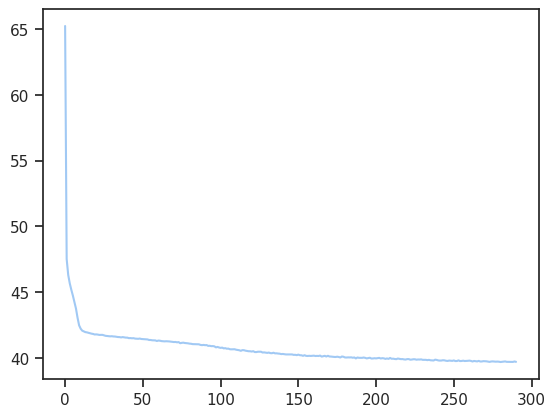

In [77]:
plt.plot(history.history['loss'])
plt.xLabel = 'epoch'
plt.yLabel = 'loss'
plt.show()

In [78]:
eval = model.evaluate(eval_features, eval_labels)
eval

306/306 [==============================] - 1s 2ms/step - loss: 42.8870 - mse: 3838.2273


[42.886959075927734, 3838.227294921875]

In [79]:
model.save('airbnb_nyc_room_price_predict_model.h5')

In [80]:
index = 3
preds = model.predict([test_features[index]])
pred_price = preds[0][-1]
actual_price = test_labels[index]
print("predicted price is", pred_price, "\nactual price is", actual_price)

1/1 [==============================] - 0s 91ms/step
predicted price is 101.03393 
actual price is 99.0


Ongoing...
